In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [4]:

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [16]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-15", tz="America/New_York").isoformat()


In [17]:
# Set the tickers
tickers = ["FB", "TWTR"]


In [18]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"


In [19]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

/Users/pete/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


FB                                        \
                             open    high       low     close    volume   
time                                                                      
2020-06-01 00:00:00-04:00  224.59  232.44  223.5000  231.9400  33886754   
2020-06-02 00:00:00-04:00  230.94  233.00  226.5600  232.8300  36197240   
2020-06-03 00:00:00-04:00  232.11  232.65  228.5300  230.0600  28224941   
2020-06-04 00:00:00-04:00  229.56  231.63  224.6100  226.2900  15405418   
2020-06-05 00:00:00-04:00  226.71  231.35  225.3105  230.7800  14358315   
2020-06-08 00:00:00-04:00  229.03  231.55  227.4100  231.4200  27642194   
2020-06-09 00:00:00-04:00  231.52  239.77  230.4100  238.6900  50558498   
2020-06-10 00:00:00-04:00  240.96  241.21  235.2800  236.6800  18383287   
2020-06-11 00:00:00-04:00  229.94  232.89  223.5500  224.4500  47636272   
2020-06-12 00:00:00-04:00  229.90  231.66  227.3102  227.3401   6834224   
2020-06-15 00:00:00-04:00  225.09  233.77  224.8000  232.4700  27221583   

                            TWTR                                     
                            open     high     low   close    volume  
time                                                                 
2020-06-01 00:00:00-04:00  31.06  32.1000  30.840  31.890  26975226  
2020-06-02 00:00:00-04:00  32.19  32.4250  31.610  32.260  26812168  
2020-06-03 00:00:00-04:00  32.61  35.0400  32.440  34.890  52237816  
2020-06-04 00:00:00-04:00  34.50  34.9400  33.340  33.730  33835688  
2020-06-05 00:00:00-04:00  34.47  35.9700  34.470  34.855  43954972  
2020-06-08 00:00:00-04:00  35.96  36.9400  35.750  36.620  34735648  
2020-06-09 00:00:00-04:00  35.99  36.2000  35.163  35.945  28916907  
2020-06-10 00:00:00-04:00  36.12  36.4400  34.900  35.140  31012112  
2020-06-11 00:00:00-04:00  33.13  34.4500  32.720  33.045  42913504  
2020-06-12 00:00:00-04:00  33.94  34.1701  32.830  32.830   8978772  
2020-06-15 00:00:00-04:00  32.91  34.1900  32.840  34.110  27931730

In [20]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)


,FB,TWTR
2020-06-01,231.9400,31.890
2020-06-02,232.8300,32.260
2020-06-03,230.0600,34.890
2020-06-04,226.2900,33.730
2020-06-05,230.7800,34.855
2020-06-08,231.4200,36.620
2020-06-09,238.6900,35.945
2020-06-10,236.6800,35.140
2020-06-11,224.4500,33.045
2020-06-12,227.3401,32.830


In [21]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()



,FB,TWTR
2020-06-02,0.003837,0.011602
2020-06-03,-0.011897,0.081525
2020-06-04,-0.016387,-0.033247
2020-06-05,0.019842,0.033353
2020-06-08,0.002773,0.050638


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR - June 2020'}>

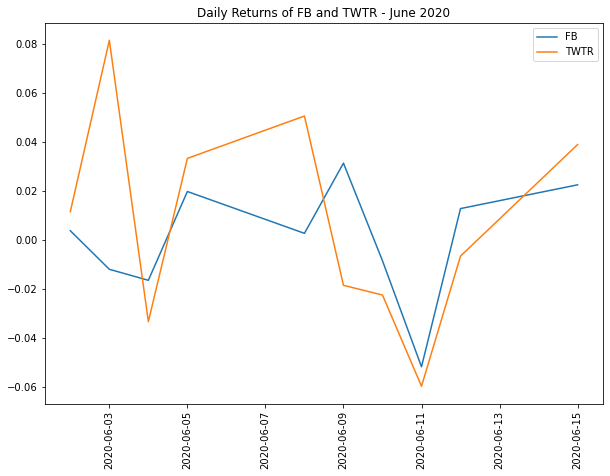

In [22]:
# Plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)


In [26]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import seaborn as sns
%matplotlib inline

In [42]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 100000

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Get 1 year's worth of historical data for Tesla and Coca-Cola
portfolio_prices_df = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

display()
# Display sample data
portfolio_prices_df.head(50)
#portfolio_prices_df.tail()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,48.95,49.0750,48.5500,48.59,10551594,55430,48.792137,KO
2019-05-02 04:00:00+00:00,48.53,48.7657,48.2700,48.39,8724932,49477,48.453170,KO
2019-05-03 04:00:00+00:00,48.60,48.9600,48.5200,48.72,7076949,39003,48.773171,KO
2019-05-06 04:00:00+00:00,48.33,48.6100,48.2600,48.47,8658209,44597,48.465858,KO
2019-05-07 04:00:00+00:00,48.23,48.2900,47.7700,48.00,12487481,59828,48.012280,KO
2019-05-08 04:00:00+00:00,48.05,48.2300,47.8200,47.85,9281542,54533,47.948017,KO
2019-05-09 04:00:00+00:00,47.80,47.9800,47.0700,47.40,11450532,67043,47.424069,KO
2019-05-10 04:00:00+00:00,47.41,48.2950,47.4000,48.19,9661832,57158,47.898366,KO
2019-05-13 04:00:00+00:00,47.93,48.1300,47.7300,48.05,11911511,61467,47.962829,KO


In [50]:
# Generate summary statistics for the `daily_returns_df` DataFrame
tsla_price = portfolio_prices_df.loc[portfolio_prices_df["symbol"] == "TSLA", ("symbol","close")]
ko_price = portfolio_prices_df.loc[portfolio_prices_df["symbol"] == "KO", ("symbol","close")]



In [78]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
#tesla_returns = tsla_price.loc['close'].pct_change().dropna()
#.plot.hist(title='TSLA Probability Distribution')
tsla_price['return'] = tsla_price['close'].pct_change()
tsla_price.dropna()

ko_price['return'] = ko_price['close'].pct_change()
ko_price.dropna()

,symbol,close,return
timestamp,,,
2019-05-02 04:00:00+00:00,KO,48.39,-0.004116
2019-05-03 04:00:00+00:00,KO,48.72,0.006820
2019-05-06 04:00:00+00:00,KO,48.47,-0.005131
2019-05-07 04:00:00+00:00,KO,48.00,-0.009697
2019-05-08 04:00:00+00:00,KO,47.85,-0.003125
...,...,...,...
2020-04-27 04:00:00+00:00,KO,46.78,0.029716
2020-04-28 04:00:00+00:00,KO,46.74,-0.000855
2020-04-29 04:00:00+00:00,KO,47.12,0.008130


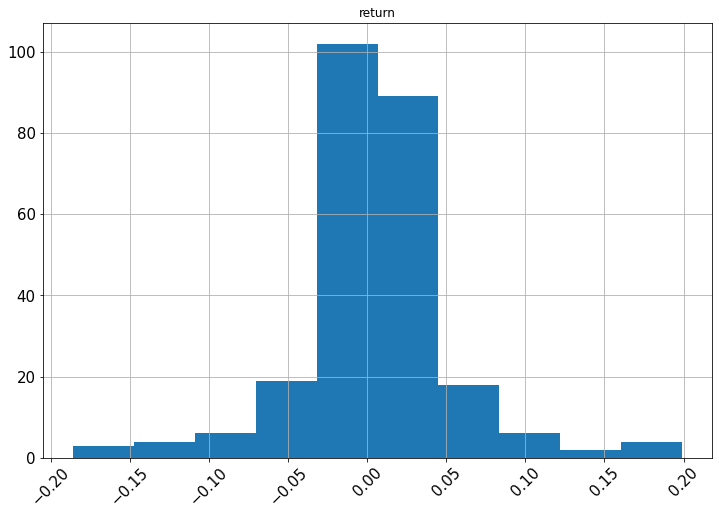

In [79]:
tsla_price.hist(column='return', by=None, grid=True, xlabelsize=15, 
                xrot=45, ylabelsize=15, yrot=None, ax=None, sharex=False, 
                sharey=False, figsize=(12,8), layout=None, bins=10, backend=None, 
                legend=False);

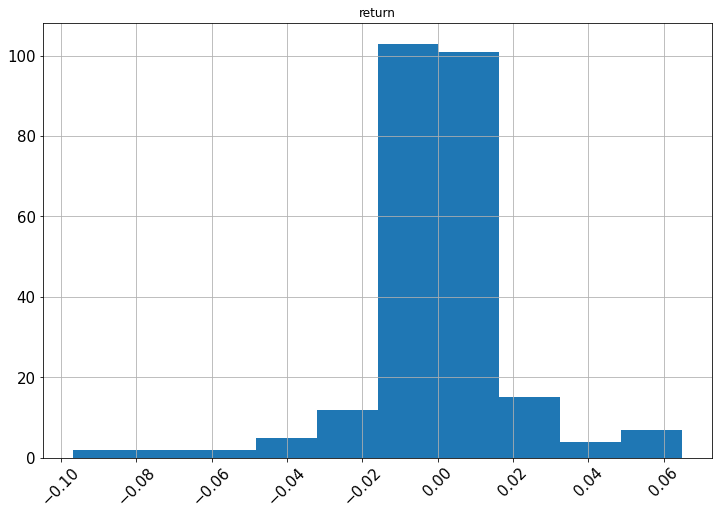

In [80]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
ko_price.hist(column='return', by=None, grid=True, xlabelsize=15, 
                xrot=45, ylabelsize=15, yrot=None, ax=None, sharex=False, 
                sharey=False, figsize=(12,8), layout=None, bins=10, backend=None, 
                legend=False);

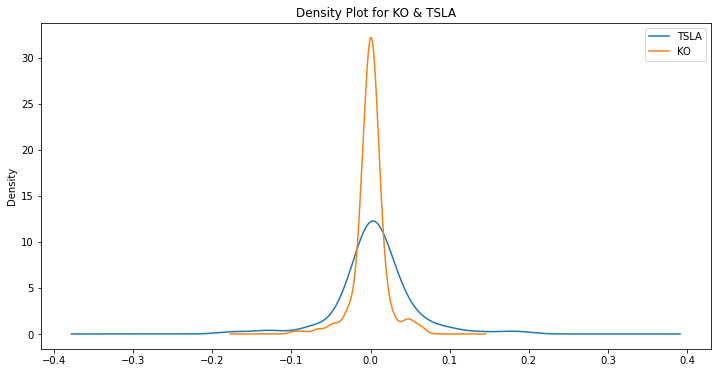

In [100]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
ax = tsla_price['return'].plot.density(title='Density Plot for KO & TSLA', figsize = (12,6), label = 'TSLA',
                                    by=None, grid=True, 
                                    sharex=False, 
                                    sharey=False, layout=None,backend=None
                                      )
ko_price['return'].plot.density(ax=ax, label = "KO");
ax.legend();